Show an example of how rolling cadence changes the distribution of visits

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [22]:
outDir ='Rolling'
dbFile = 'ops2_1098_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)
nightLimits = (np.arange(3)+1)*365
nightLimits = np.append(nightLimits, 3653.)
nside = 64

In [23]:
bundleList = []
plotDict ={}
sm = metrics.MedianMetric()
for night in nightLimits:
    metric = metrics.CountMetric(col='expMJD')
    slicer = slicers.HealpixSlicer(nside=nside,lonCol='ditheredRA',latCol='ditheredDec')
    sql = 'filter = "r" and night < %i' % night
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=sm))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [24]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg =  metricBundles.MetricBundleGroup(bd, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database with constraint filter = "r" and night < 365
Found 51413 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 3653
Found 535139 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_3653_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 1095
Found 158194 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 730
Found 108100 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" and night < 365 sqlconstraint now.

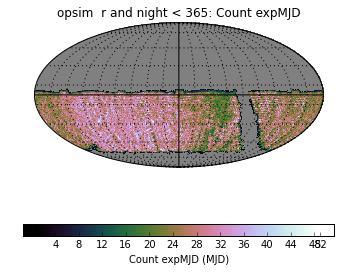

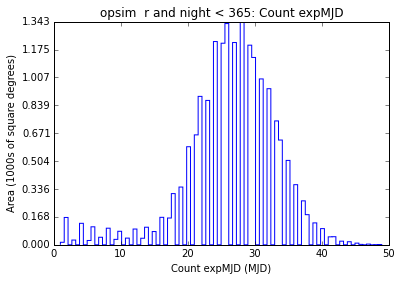

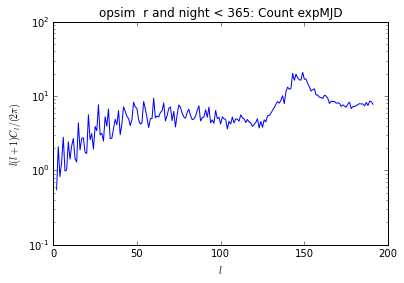

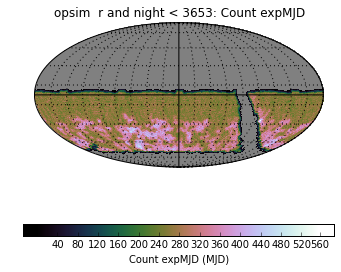

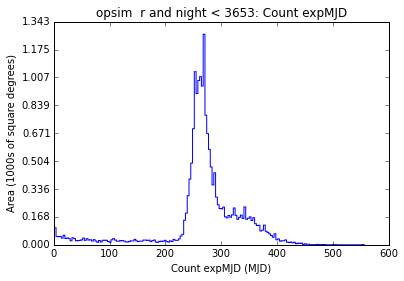

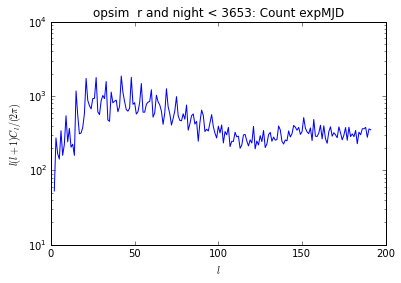

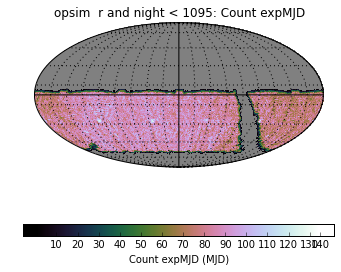

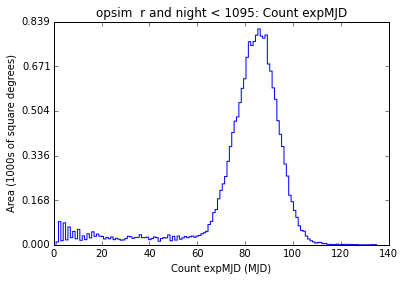

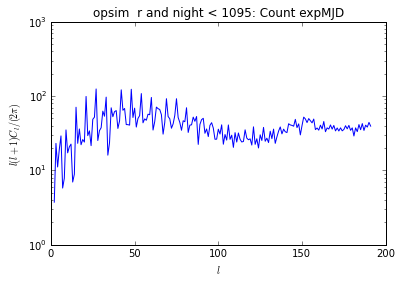

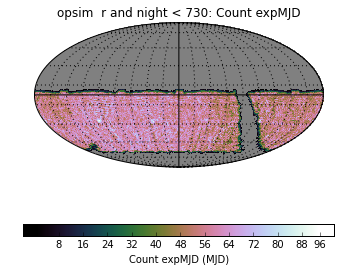

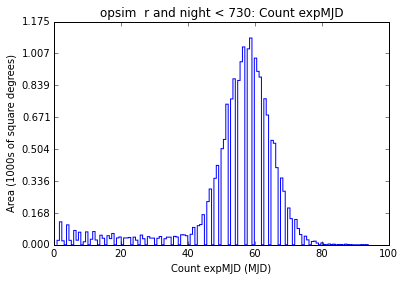

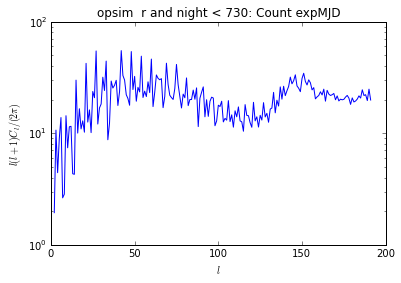

In [31]:
bg.runAll()
bg.plotAll(closefigs=False)

In [32]:
for bundle in bundleList:
    print bundle.sqlconstraint, bundle.summaryValues

filter = "r" and night < 365 {'Median': 27.0}
filter = "r" and night < 730 {'Median': 57.0}
filter = "r" and night < 1095 {'Median': 84.0}
filter = "r" and night < 3653 {'Median': 269.0}


In [33]:
dbFile = 'enigma_1260_sqlite.db' # Cheese2
opsimdb = utils.connectOpsimDb(dbFile)
bg =  metricBundles.MetricBundleGroup(bd, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database with constraint filter = "r" and night < 365
Found 47053 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 3653
Found 469113 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_3653_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 1095
Found 140822 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 730
Found 94629 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" and night < 365 sqlconstraint now.


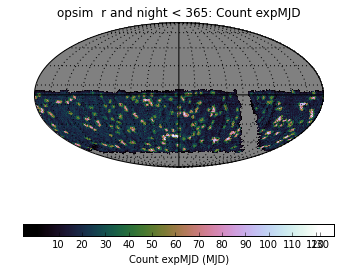

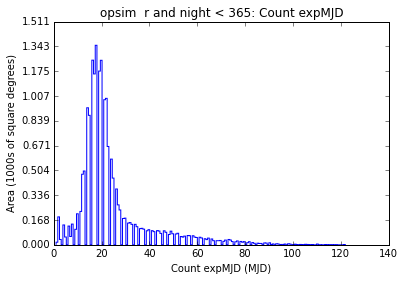

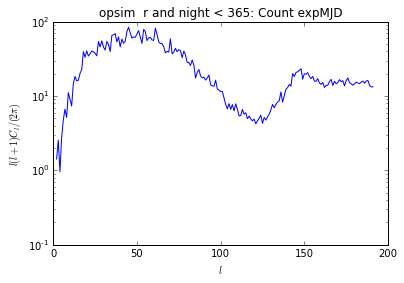

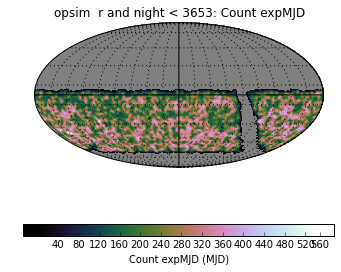

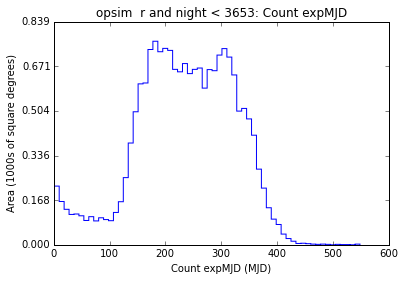

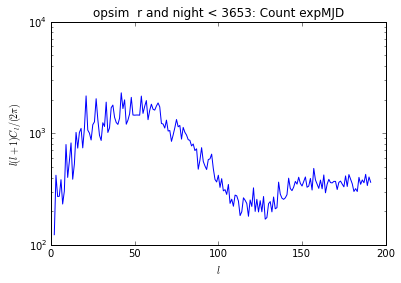

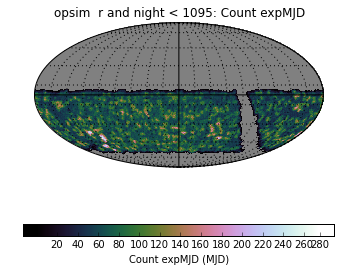

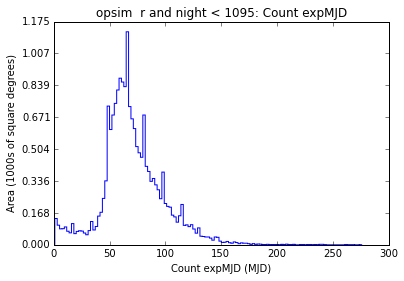

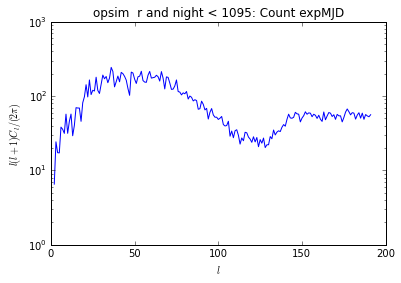

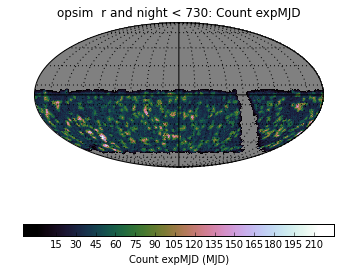

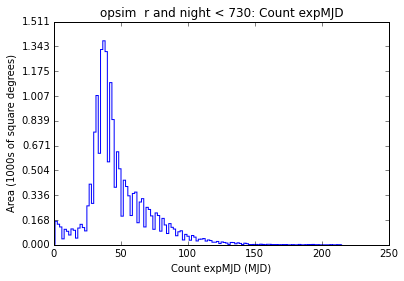

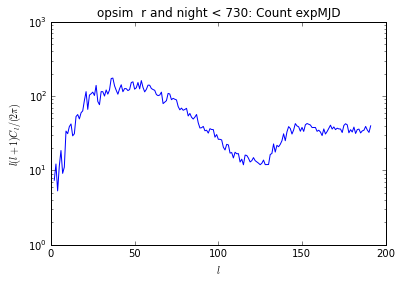

In [34]:
bg.runAll()
bg.plotAll(closefigs=False)

In [35]:
for bundle in bundleList:
    print bundle.sqlconstraint, bundle.summaryValues

filter = "r" and night < 365 {'Median': 20.0}
filter = "r" and night < 730 {'Median': 42.0}
filter = "r" and night < 1095 {'Median': 67.0}
filter = "r" and night < 3653 {'Median': 238.0}
